# 탐색적 데이터 분석(EDA)

## 0. 필요 라이브러리 import



In [546]:
#필요한 패키지를 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (8, 8)

In [547]:
data = pd.read_csv('data/최종데이터/최종_열삭제전.csv', encoding='utf-8', index_col=0)
data

,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,...,눈비,강수량,확진자수,SO2,CO,O3,NO2,PM25,적설,주문건수
0,경기도,2019-07-17,수,0,도시락,여름,0,0,22.86,0.54,...,0,0.0,0.0,0.004,0.628,0.025,0.027,54.272,0.0,1
1,경기도,2019-07-17,수,11,도시락,여름,0,0,26.80,1.34,...,0,0.0,0.0,0.003,0.544,0.046,0.018,39.076,0.0,13
2,경기도,2019-07-17,수,12,도시락,여름,0,0,27.26,1.46,...,0,0.0,0.0,0.003,0.526,0.057,0.018,40.727,0.0,14
3,경기도,2019-07-17,수,13,도시락,여름,0,0,27.52,1.48,...,0,0.0,0.0,0.003,0.531,0.066,0.017,42.947,0.0,13
4,경기도,2019-07-17,수,14,도시락,여름,0,0,27.44,1.38,...,1,2.2,0.0,0.004,0.539,0.070,0.018,45.211,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226858,서울,2020-09-30,수,19,회,가을,1,0,19.00,2.70,...,1,29.5,30.0,0.003,0.428,0.034,0.018,21.120,0.0,7
226859,서울,2020-09-30,수,20,회,가을,1,0,18.40,1.90,...,1,4.5,30.0,0.003,0.420,0.032,0.016,20.040,0.0,11
226860,서울,2020-09-30,수,21,회,가을,1,0,18.20,0.70,...,0,0.0,30.0,0.003,0.444,0.023,0.018,16.680,0.0,3
226861,서울,2020-09-30,수,22,회,가을,1,0,17.60,1.50,...,0,0.0,30.0,0.002,0.424,0.017,0.019,14.320,0.0,7


In [548]:
data['날짜'] = pd.to_datetime(data['날짜'])

<AxesSubplot:>

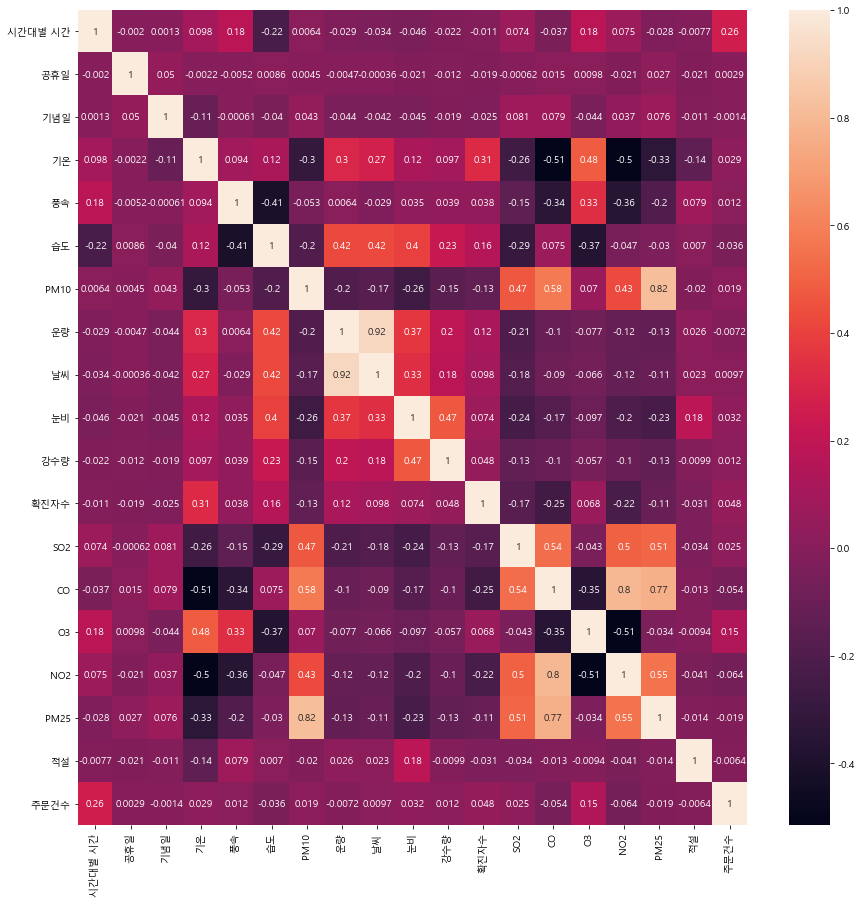

In [549]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)


* PM10 이외의 대기 관련 데이터는 모두 지움

In [550]:
data.drop(['SO2', 'CO', 'O3', 'NO2', 'PM25'], axis=1, inplace=True)

* 적설도 눈비 컬럼으로 변경하였으므로 삭제

In [551]:
data.drop(['적설'], axis=1, inplace=True)

In [552]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226863 entries, 0 to 226862
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   광역시도명    226863 non-null  object        
 1   날짜       226863 non-null  datetime64[ns]
 2   요일       226863 non-null  object        
 3   시간대별 시간  226863 non-null  int64         
 4   업종명      226863 non-null  object        
 5   계절       226863 non-null  object        
 6   공휴일      226863 non-null  int64         
 7   기념일      226863 non-null  int64         
 8   기온       226863 non-null  float64       
 9   풍속       226863 non-null  float64       
 10  습도       226863 non-null  float64       
 11  PM10     226863 non-null  float64       
 12  운량       226863 non-null  float64       
 13  날씨       226863 non-null  int64         
 14  눈비       226863 non-null  int64         
 15  강수량      226863 non-null  float64       
 16  확진자수     226863 non-null  float64       
 17  주문건수     2

## - 심부름 데이터 삭제
* KT-빅데이터 센터에 문의 결과 심부름은 요식업과 무관한 핸드폰, 자동차 부품과 관련된 배달 건수라는 답변을 받았으므로 삭제

In [553]:
data.drop(data.loc[data['업종명']=='심부름'].index, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,습도,PM10,운량,날씨,눈비,강수량,확진자수,주문건수
0,경기도,2019-07-17,수,0,도시락,여름,0,0,22.86,0.54,91.2,79.512,6.4,3,0,0.0,0.0,1
1,경기도,2019-07-17,수,11,도시락,여름,0,0,26.80,1.34,71.6,58.013,9.2,4,0,0.0,0.0,13
2,경기도,2019-07-17,수,12,도시락,여름,0,0,27.26,1.46,71.4,57.240,9.8,4,0,0.0,0.0,14
3,경기도,2019-07-17,수,13,도시락,여름,0,0,27.52,1.48,69.8,60.360,9.8,4,0,0.0,0.0,13
4,경기도,2019-07-17,수,14,도시락,여름,0,0,27.44,1.38,72.6,64.595,10.0,4,1,2.2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221205,서울,2020-09-30,수,19,회,가을,1,0,19.00,2.70,90.0,31.320,10.0,4,1,29.5,30.0,7
221206,서울,2020-09-30,수,20,회,가을,1,0,18.40,1.90,91.0,27.520,5.0,2,1,4.5,30.0,11
221207,서울,2020-09-30,수,21,회,가을,1,0,18.20,0.70,91.0,22.720,7.0,3,0,0.0,30.0,3
221208,서울,2020-09-30,수,22,회,가을,1,0,17.60,1.50,92.0,19.600,6.0,3,0,0.0,30.0,7


## 1. 전체 데이터

* 서울, 경기를 분리하지 않고, 전체적인 추세를 보기 위한 전체에 대한 배달주문건수를 확인


### 1-1) 주문건수
* 전체 기간 업종별 총 주문건수 확인

In [554]:
# 전체 주문건수 비율 확인
(data.groupby('업종명').agg({'주문건수':sum}) * 100 / data.groupby('업종명').agg({'주문건수':sum}).sum()).sort_values(by='주문건수', ascending=False)

,주문건수
업종명,
치킨,22.757434
한식,12.473436
분식,11.524438
카페/디저트,8.481837
족발/보쌈,8.313600
패스트푸드,7.393767
피자,5.113853
돈까스/일식,5.034087
야식,4.063788


In [555]:
def bar_plotting(df=None, X=None, aggfunc=None):
    
    group_data = df.groupby(X).agg({'주문건수':aggfunc})

    sns.barplot(data=group_data, x=group_data.index, y='주문건수', palette='colorblind')
    
    x = np.arange(0, group_data.index.shape[0])
    y = group_data['주문건수'].reset_index(drop=True).values
    
    for i, v in enumerate(x):
        plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                 fontsize = 11, 
                 color='black',
                 horizontalalignment='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

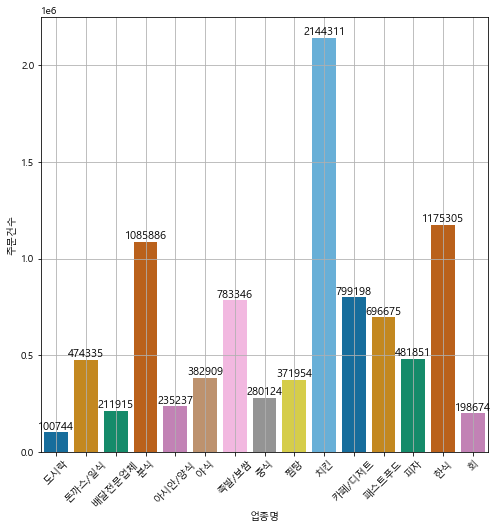

In [556]:
bar_plotting(df=data, X='업종명', aggfunc=sum)

치킨의 주문건수 압도적으로 많음

* 2019년, 2020년 각각 업종별 배달 주문건수 확인

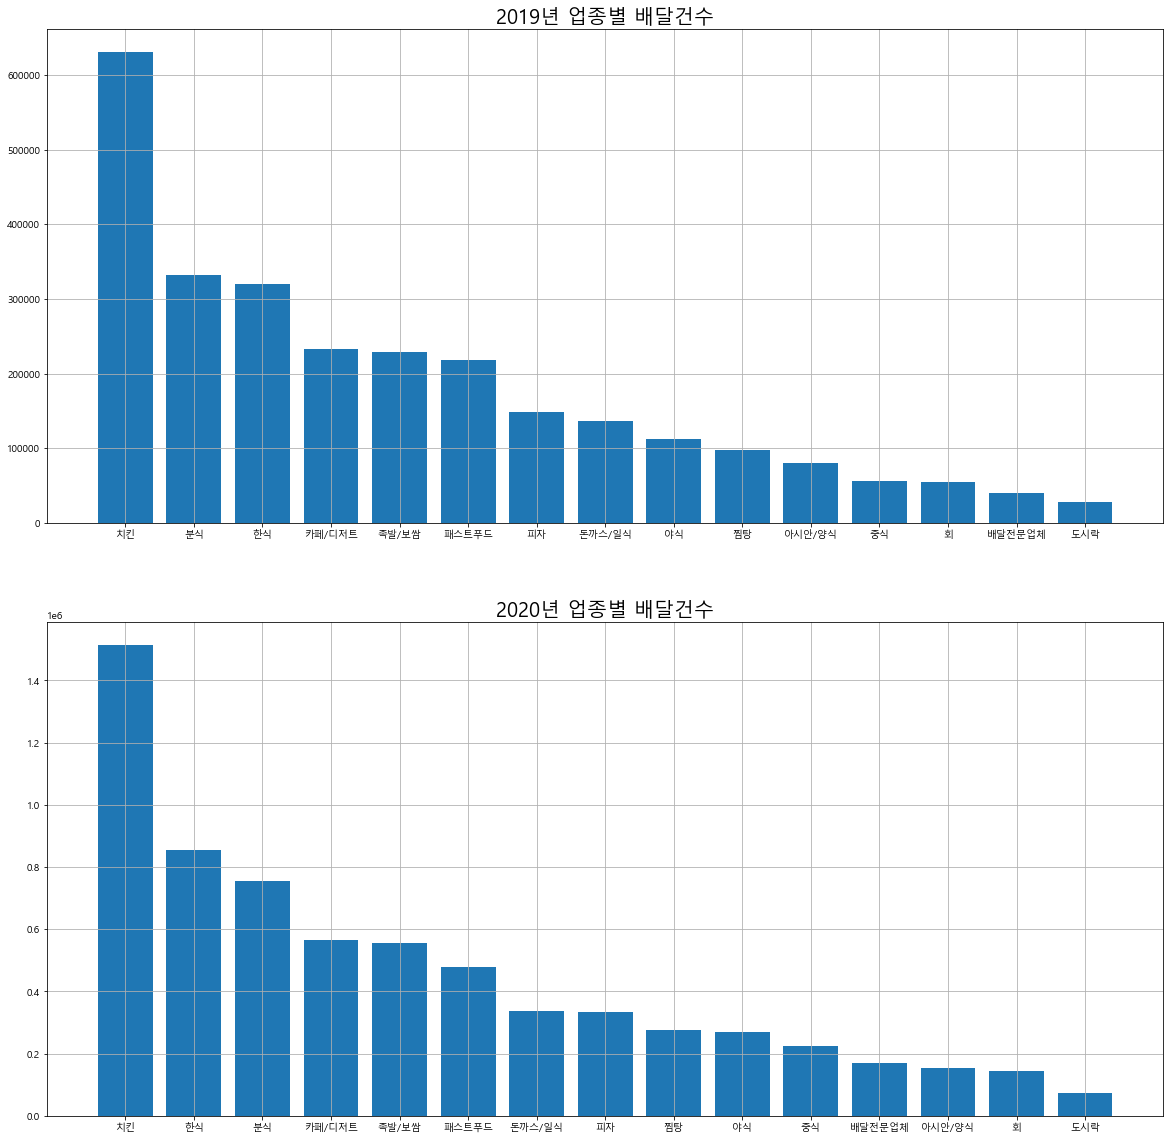

In [557]:

years = [2019, 2020]
data['year'] = data['날짜'].dt.year

group_data = data.groupby(['year', '업종명']).agg({'주문건수': sum}).reset_index().sort_values('주문건수', ascending=False)

# 연도별 subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

for i, year in enumerate(years):

    # 연도에 해당하는 데이터 추출
    temp_data = group_data.loc[group_data['year']==year]
    
    axes[i].bar(temp_data['업종명'], temp_data['주문건수'])
    axes[i].grid()
    axes[i].set_title(str(year)+'년 업종별 배달건수', size=20)

    
plt.show()

## 2. 각 업종별 비교

### 2-1) 치킨

In [558]:
chicken = data.loc[data['업종명'] == '치킨'].reset_index(drop=True)

chicken_sl = chicken.loc[chicken['광역시도명']=='서울']
chicken_gg = chicken.loc[chicken['광역시도명']=='경기도']

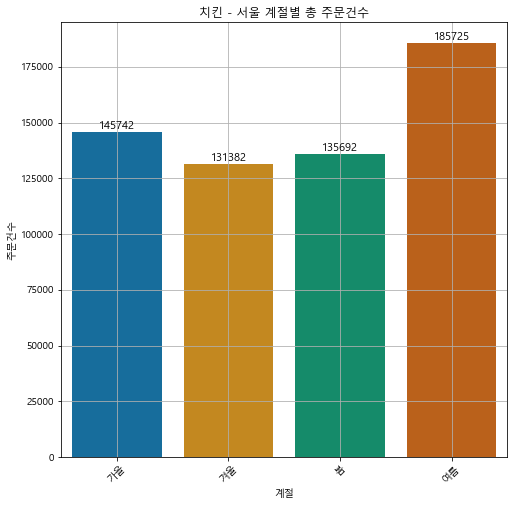

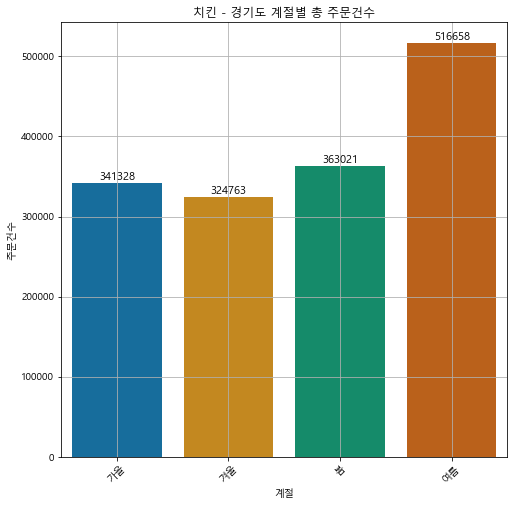

In [559]:
## 1. 계절별 총 주문건수 

plt.title('치킨 - 서울 계절별 총 주문건수')
bar_plotting(df=chicken_sl, X='계절', aggfunc=sum)

plt.title('치킨 - 경기도 계절별 총 주문건수')
bar_plotting(df=chicken_gg, X='계절', aggfunc=sum)


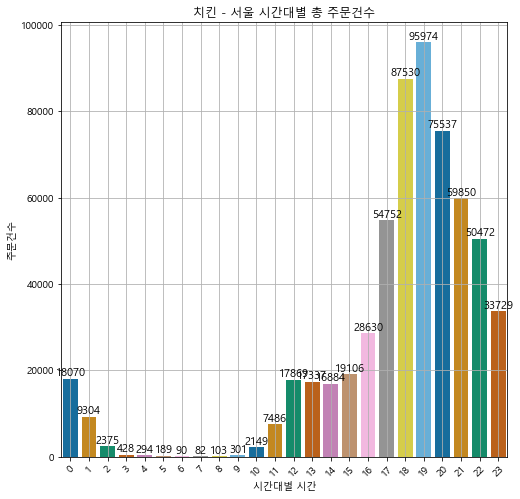

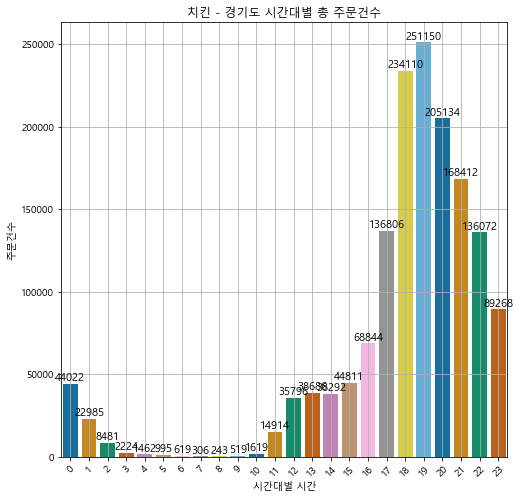

In [560]:
## 2. 시간대별 총 주문건수

plt.title('치킨 - 서울 시간대별 총 주문건수')
bar_plotting(df=chicken_sl, X='시간대별 시간', aggfunc=sum)

plt.title('치킨 - 경기도 시간대별 총 주문건수')
bar_plotting(df=chicken_gg, X='시간대별 시간', aggfunc=sum)

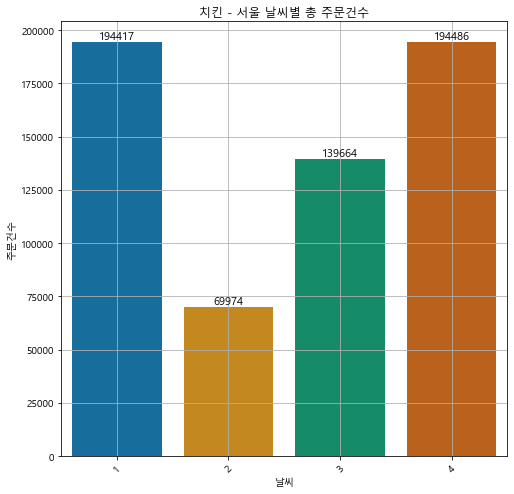

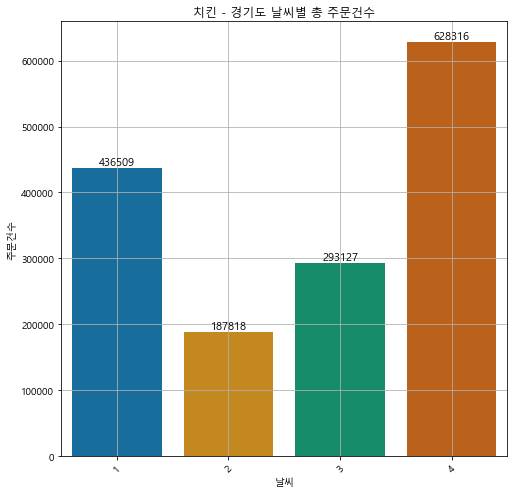

In [561]:
## 3. 날씨별 총 주문건수

plt.title('치킨 - 서울 날씨별 총 주문건수')
bar_plotting(df=chicken_sl, X='날씨', aggfunc=sum)

plt.title('치킨 - 경기도 날씨별 총 주문건수')
bar_plotting(df=chicken_gg, X='날씨', aggfunc=sum)

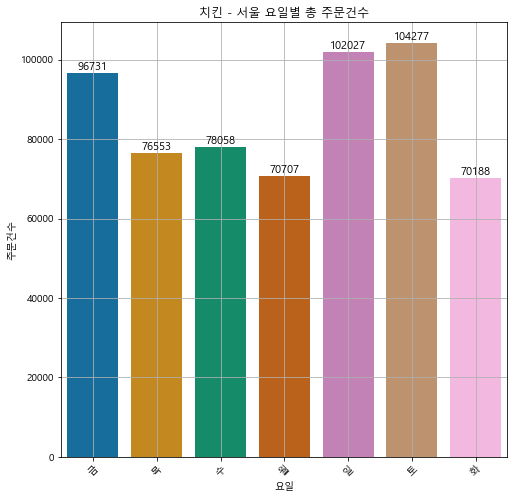

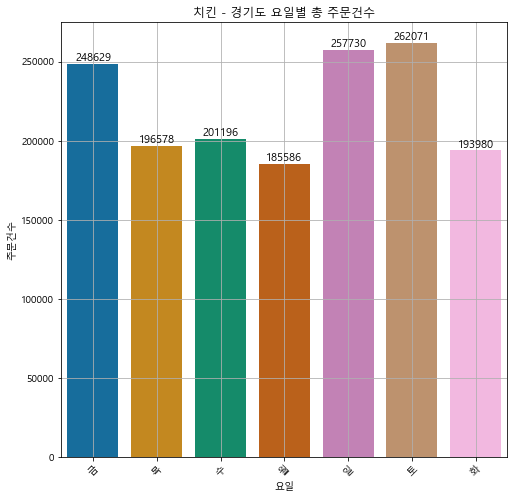

In [562]:
## 4. 요일별 총 주문건수

plt.title('치킨 - 서울 요일별 총 주문건수')
bar_plotting(df=chicken_sl, X='요일', aggfunc=sum)

plt.title('치킨 - 경기도 요일별 총 주문건수')
bar_plotting(df=chicken_gg, X='요일', aggfunc=sum)

In [563]:
tmp = chicken_gg.groupby(['계절', '시간대별 시간']).sum()[['주문건수']].reset_index()
temp = chicken_gg.groupby(['계절', '시간대별 시간']).mean()[['습도']].reset_index()

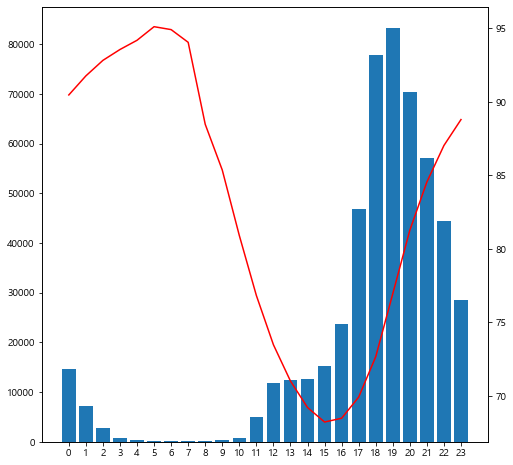

In [564]:
plt.bar(tmp.loc[tmp['계절']=='여름']['시간대별 시간'], tmp.loc[tmp['계절']=='여름']['주문건수'])
ax2 = plt.twinx()
ax2.plot(temp.loc[temp['계절']=='여름']['시간대별 시간'], temp.loc[temp['계절']=='여름']['습도'], 'r')
plt.xticks(np.arange(0, 24))
plt.show()

In [565]:
time_dummies = pd.get_dummies(chicken_gg['시간대별 시간'], prefix='time')
weekday_dummies = pd.get_dummies(chicken_gg['요일'], prefix='week')
season_dummies = pd.get_dummies(chicken_gg['계절'], prefix='season')
holiday_dummies = pd.get_dummies(chicken_gg['공휴일'], prefix='holiday')
holiday2_dummies = pd.get_dummies(chicken_gg['기념일'], prefix='holiday2')
climate_dummies = pd.get_dummies(chicken_gg['날씨'], prefix='climate')
rain_snow_dummies = pd.get_dummies(chicken_gg['눈비'], prefix='rain_snow')

holiday_dummies

,holiday_0,holiday_1,holiday_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
9250,0,1,0
9251,0,1,0
9252,0,1,0
9253,0,1,0


C:\Users\Park\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,...,강수량,확진자수,SO2,CO,O3,NO2,PM25,적설,주문건수,year
2349,경기도,2019-10-29,화,3,한식,가을,0,0,10.52,0.40,...,0.1,0.0,0.003,0.432,0.027,0.013,26.099,0.0,1,2019
2350,경기도,2019-10-29,화,4,한식,가을,0,0,9.84,0.34,...,0.0,0.0,0.003,0.444,0.019,0.016,24.451,0.0,1,2019
2351,경기도,2019-10-29,화,5,한식,가을,0,0,9.34,0.36,...,0.0,0.0,0.003,0.448,0.013,0.019,22.805,0.0,1,2019
2352,경기도,2019-10-29,화,7,한식,가을,0,0,8.64,0.92,...,0.0,0.0,0.003,0.510,0.005,0.027,20.451,0.0,2,2019
2353,경기도,2019-10-29,화,9,한식,가을,0,0,10.48,0.88,...,0.0,0.0,0.003,0.625,0.005,0.033,24.024,0.0,5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,경기도,2020-05-11,월,19,한식,봄,0,0,17.88,1.30,...,0.0,8.0,0.003,0.389,0.046,0.019,19.823,0.0,318,2020
6925,경기도,2020-05-11,월,20,한식,봄,0,0,16.74,1.20,...,0.0,8.0,0.003,0.416,0.043,0.021,21.271,0.0,216,2020
6926,경기도,2020-05-11,월,21,한식,봄,0,0,15.84,1.48,...,0.0,8.0,0.003,0.443,0.038,0.023,22.371,0.0,137,2020
6927,경기도,2020-05-11,월,22,한식,봄,0,0,14.40,1.68,...,0.5,8.0,0.003,0.422,0.037,0.019,22.969,0.0,87,2020


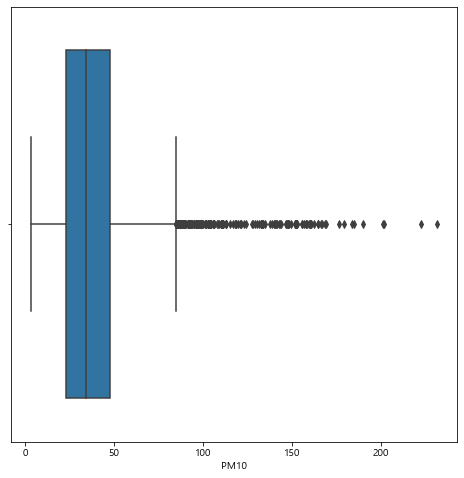

In [566]:
sns.boxplot(chicken_gg['PM10'])

chicken_gg.loc[chicken_gg['PM10'] >= 100]

In [567]:
tmp = pd.concat([chicken_gg, time_dummies, weekday_dummies, season_dummies, holiday_dummies, holiday2_dummies, climate_dummies, rain_snow_dummies], axis=1).drop(['시간대별 시간', '요일', '계절', '공휴일', '기념일', '날씨', '눈비'], axis=1)

<AxesSubplot:>

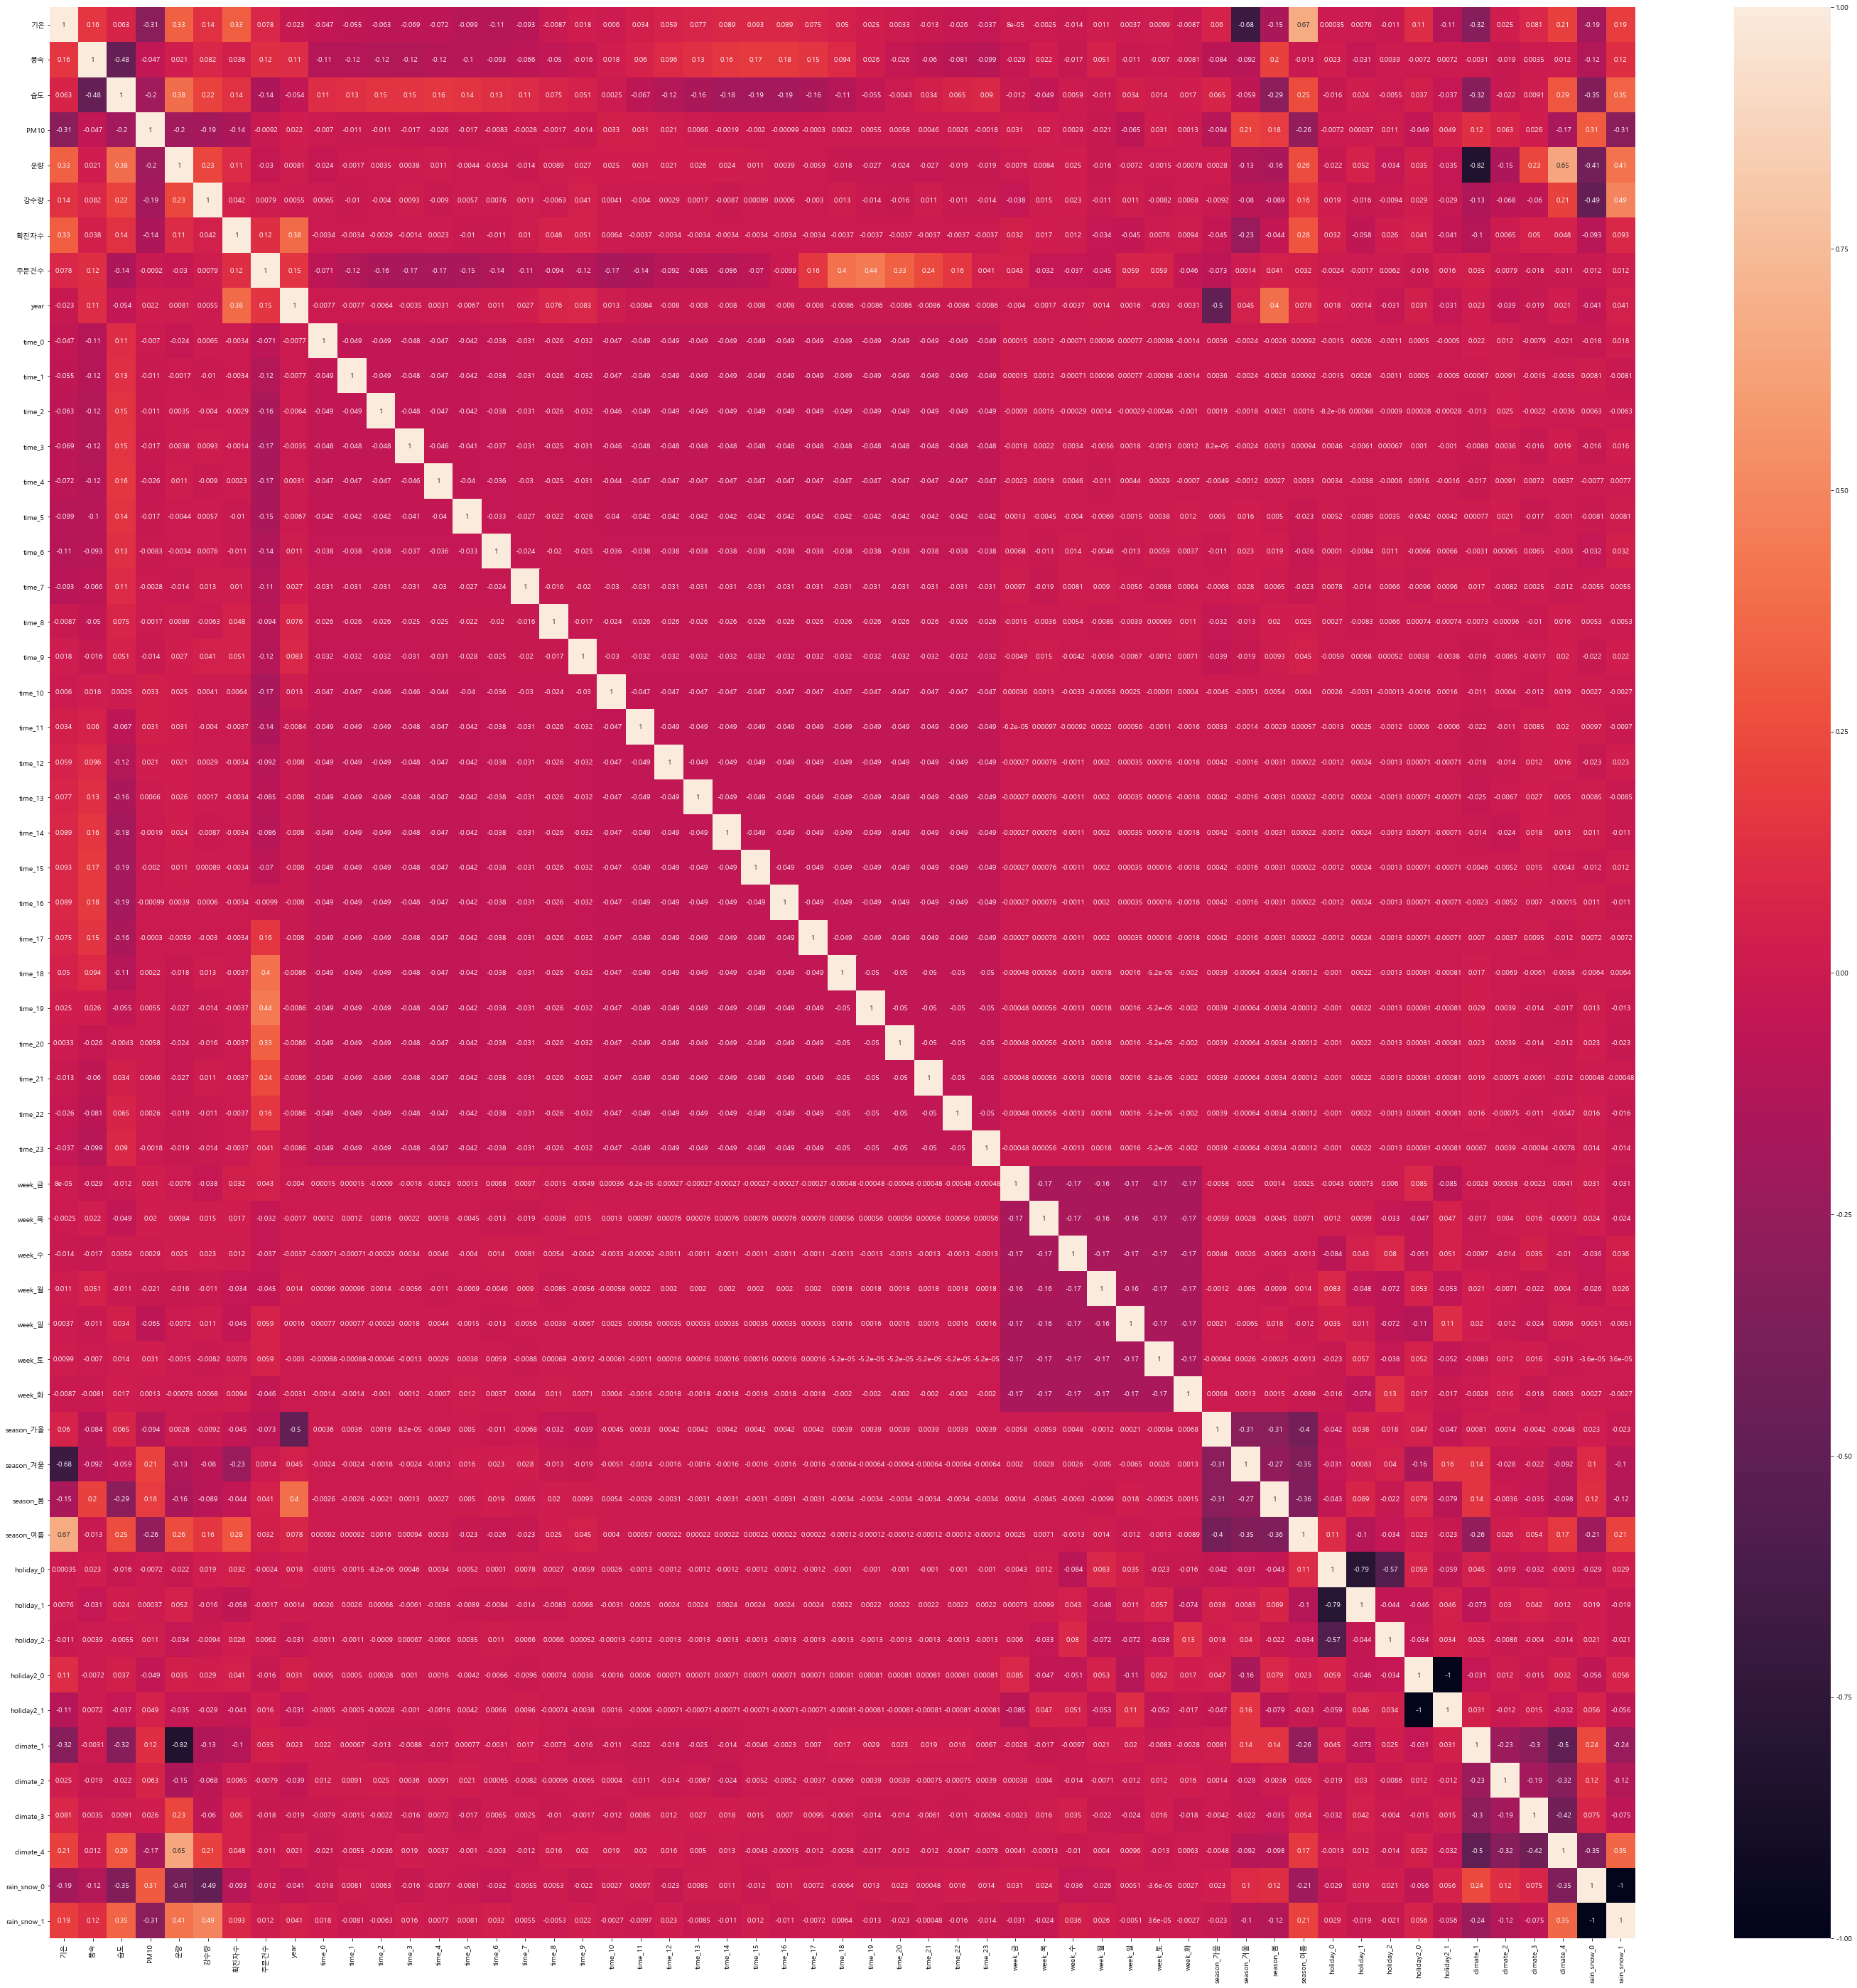

In [568]:
plt.figure(figsize=(50, 50))
sns.heatmap(tmp.corr(), annot=True)


In [569]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np


In [570]:
data_tmp = tmp[tmp.columns.difference(['주문건수', '광역시도명', '업종명', '날짜'])]
target = tmp['주문건수'].values

In [571]:
X_train , X_test , y_train , y_test = train_test_split(data_tmp.values , target ,test_size=0.3, random_state=156)

In [572]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6478, 54), (2777, 54), (6478,), (2777,))

In [573]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [574]:
lr = LinearRegression().fit(X_train, y_train)
print(lr) #사용된 parameter를 알 수 있음 

LinearRegression()


In [575]:
print(lr.score(X_train, y_train))
lr.score(X_test, y_test)

0.8572779682862228


0.8461200084449738

In [576]:

for col, coef in zip(data_tmp.columns, lr.coef_ ):
    print(f'{col} : {coef}')

PM10 : -0.16668671470326935
climate_1 : -869944192587.4312
climate_2 : -869944192579.6938
climate_3 : -869944192588.6003
climate_4 : -869944192587.7755
holiday2_0 : -2925558050348.852
holiday2_1 : -2925558050323.9277
holiday_0 : -14314040732.796335
holiday_1 : -14314040748.015089
holiday_2 : -14314040702.719738
rain_snow_0 : 70599218889.01956
rain_snow_1 : 70599218895.19954
season_가을 : 96887522532.83728
season_겨울 : 96887522510.54373
season_봄 : 96887522530.07715
season_여름 : 96887522548.44756
time_0 : -9635879392.126892
time_1 : -9635879442.80603
time_10 : -9635879488.658585
time_11 : -9635879446.362335
time_12 : -9635879395.872917
time_13 : -9635879385.388184
time_14 : -9635879384.708954
time_15 : -9635879369.028687
time_16 : -9635879311.579185
time_17 : -9635879157.388554
time_18 : -9635878935.00011
time_19 : -9635878909.584396
time_2 : -9635879478.264404
time_20 : -9635879015.309334
time_21 : -9635879100.384888
time_22 : -9635879180.813793
time_23 : -9635879287.948147
time_3 : -963587

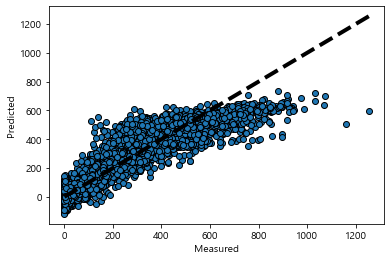

In [577]:
predicted = lr.predict(X_train) #먼저 값을 예측

fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0)) #실제값과 예측값으로 점을 찍어 표시 - 둘이 다를 수 있음
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4) #실제값과 예측값이 같은 지점을 연결해서 선을 표시
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

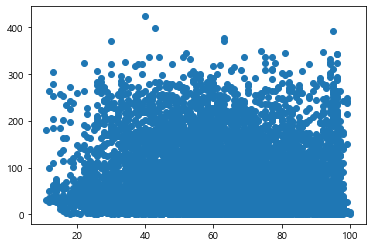

In [578]:
plt.scatter(chicken_sl['습도'], chicken_sl['주문건수'])

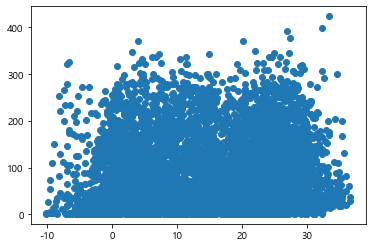

In [579]:
plt.scatter(chicken_sl['기온'], chicken_sl['주문건수'])

### 2-2) 한식

In [580]:
korea = data.loc[data['업종명']=='한식'].reset_index(drop=True)

korea_sl = korea.loc[korea['광역시도명']=='서울']
korea_gg = korea.loc[korea['광역시도명']=='경기도']

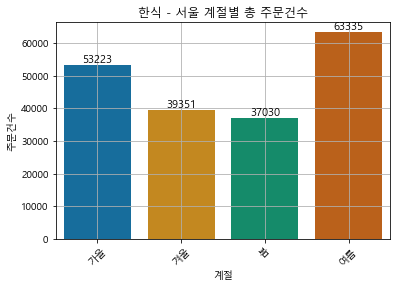

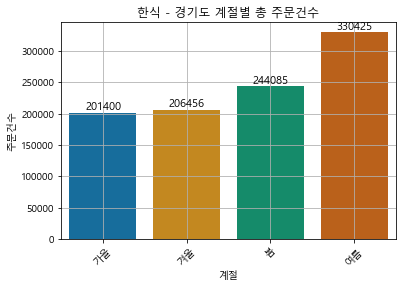

In [581]:
## 1. 계절별 총 주문건수 

plt.title('한식 - 서울 계절별 총 주문건수')
bar_plotting(df=korea_sl, X='계절', aggfunc=sum)

plt.title('한식 - 경기도 계절별 총 주문건수')
bar_plotting(df=korea_gg, X='계절', aggfunc=sum)

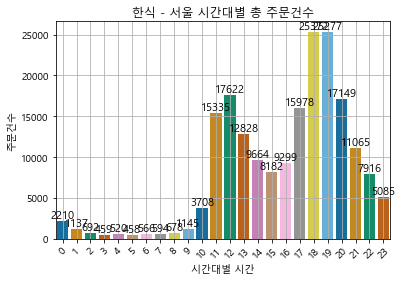

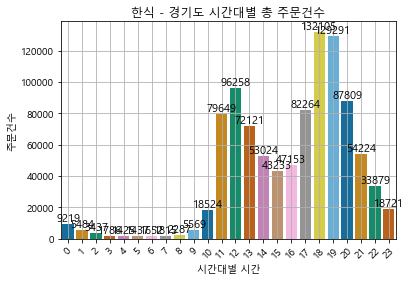

In [582]:
## 2. 시간대별 총 주문건수

plt.title('한식 - 서울 시간대별 총 주문건수')
bar_plotting(df=korea_sl, X='시간대별 시간', aggfunc=sum)

plt.title('한식 - 경기도 시간대별 총 주문건수')
bar_plotting(df=korea_gg, X='시간대별 시간', aggfunc=sum)

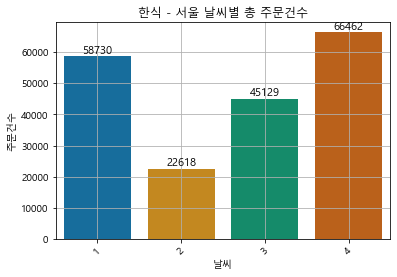

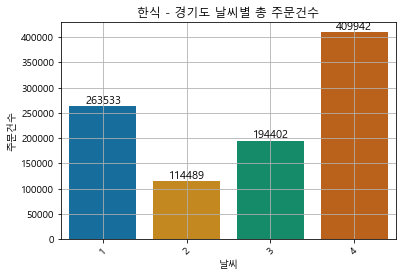

In [583]:
## 3. 날씨별 총 주문건수

plt.title('한식 - 서울 날씨별 총 주문건수')
bar_plotting(df=korea_sl, X='날씨', aggfunc=sum)

plt.title('한식 - 경기도 날씨별 총 주문건수')
bar_plotting(df=korea_gg, X='날씨', aggfunc=sum)

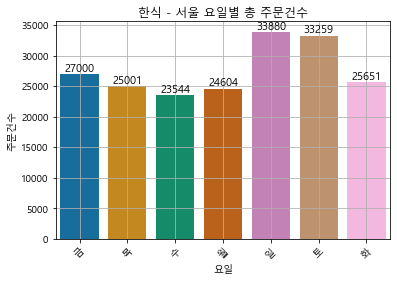

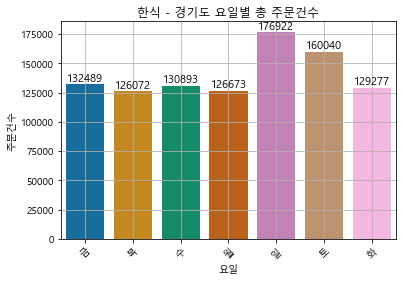

In [584]:
## 4. 요일별 총 주문건수

plt.title('한식 - 서울 요일별 총 주문건수')
bar_plotting(df=korea_sl, X='요일', aggfunc=sum)

plt.title('한식 - 경기도 요일별 총 주문건수')
bar_plotting(df=korea_gg, X='요일', aggfunc=sum)

### 2-3) 분식

In [585]:
street = data.loc[data['업종명']=='분식'].reset_index(drop=True)


street_sl = street.loc[street['광역시도명']=='서울']
street_gg = street.loc[street['광역시도명']=='경기도']

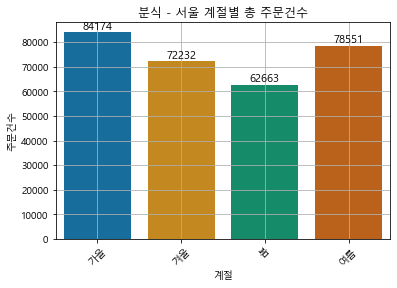

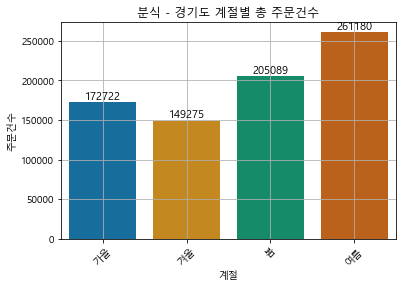

In [586]:
## 1. 계절별 총 주문건수 
plt.title('분식 - 서울 계절별 총 주문건수')
bar_plotting(df=street_sl, X='계절', aggfunc=sum)

plt.title('분식 - 경기도 계절별 총 주문건수')
bar_plotting(df=street_gg, X='계절', aggfunc=sum)

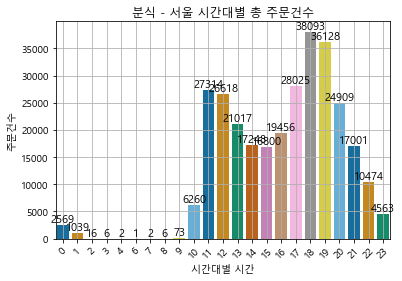

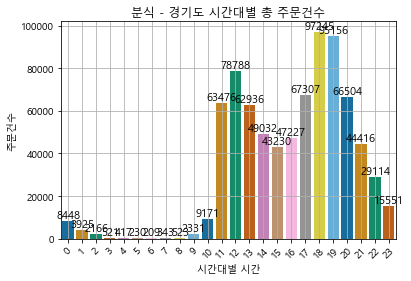

In [587]:
## 2. 시간대별 총 주문건수

plt.title('분식 - 서울 시간대별 총 주문건수')
bar_plotting(df=street_sl, X='시간대별 시간', aggfunc=sum)

plt.title('분식 - 경기도 시간대별 총 주문건수')
bar_plotting(df=street_gg, X='시간대별 시간', aggfunc=sum)

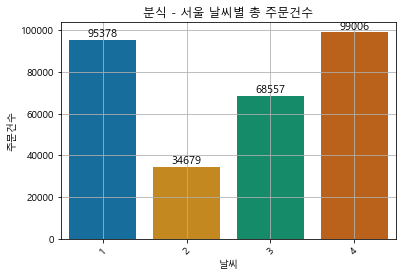

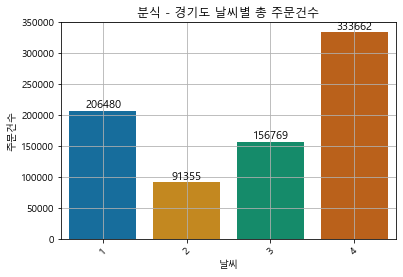

In [588]:
## 3. 날씨별 총 주문건수

plt.title('분식 - 서울 날씨별 총 주문건수')
bar_plotting(df=street_sl, X='날씨', aggfunc=sum)

plt.title('분식 - 경기도 날씨별 총 주문건수')
bar_plotting(df=street_gg, X='날씨', aggfunc=sum)

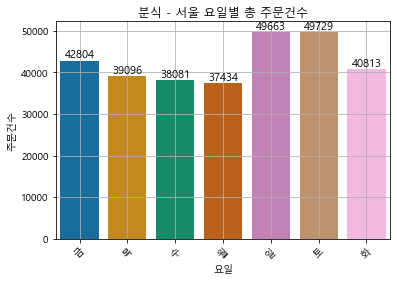

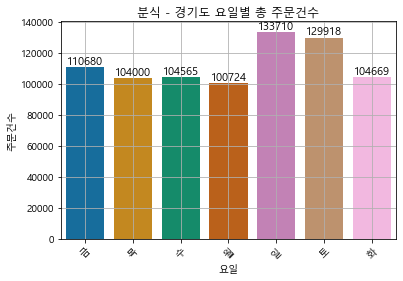

In [589]:
## 4. 요일별 총 주문건수

plt.title('분식 - 서울 요일별 총 주문건수')
bar_plotting(df=street_sl, X='요일', aggfunc=sum)

plt.title('분식 - 경기도 요일별 총 주문건수')
bar_plotting(df=street_gg, X='요일', aggfunc=sum)

In [590]:
simbureum = data.loc[data['업종명']=='심부름']

sim_sl = simbureum.loc[simbureum['광역시도명']=='서울']
sim_gg = simbureum.loc[simbureum['광역시도명']=='경기도']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

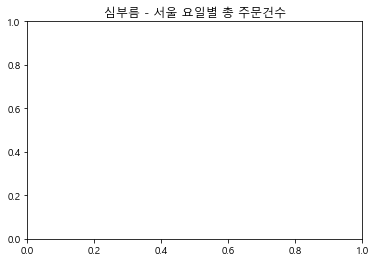

In [591]:
## 4. 요일별 총 주문건수

plt.title('심부름 - 서울 요일별 총 주문건수')
bar_plotting(df=sim_sl, X='요일', aggfunc=sum)

plt.title('심부름 - 경기도 요일별 총 주문건수')
bar_plotting(df=sim_gg, X='요일', aggfunc=sum)

### 2-4) 카페/디저트


In [ ]:
dessert = data.loc[data['업종명']=='카페/디저트']

dessert_sl = dessert.loc[dessert['광역시도명']=='서울']
dessert_gg = dessert.loc[dessert['광역시도명']=='경기도']

In [ ]:
plt.title('야식 - 서울 요일별 총 주문건수')
bar_plotting(df=night_sl, X='시간대별 시간', aggfunc=sum)

plt.title('야식 - 서울 요일별 총 주문건수')
bar_plotting(df=night_gg, X='시간대별 시간', aggfunc=sum)

In [ ]:
## 4. 요일별 총 주문건수

plt.title('배달전문업체 - 서울 요일별 총 주문건수')
bar_plotting(df=delivery_sl, X='요일', aggfunc=sum)

plt.title('배달전문업체 - 경기도 요일별 총 주문건수')
bar_plotting(df=delivery_gg, X='요일', aggfunc=sum)


In [ ]:
delivery = data.loc[data['업종명']=='배달전문업체']

delivery_sl = delivery.loc[delivery['광역시도명']=='서울']
delivery_gg = delivery.loc[delivery['광역시도명']=='경기도']

In [ ]:
night = data.loc[data['업종명']=='야식']

night_sl = night.loc[night['광역시도명']=='서울']
night_gg = night.loc[night['광역시도명']=='경기도']